<a href="https://colab.research.google.com/github/iwshim/data_analysis/blob/main/w2_numpy_scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <strong>ndarray</strong>

In [ ]:
import numpy as np
# 10^7 sized array generation
arr = np.arange(1e7)
# convert ndarray to list
larr = arr.tolist()

# list type cannot broadcasting the data
def list_times(alist, scalar):
  for i, val in enumerate(alist):
    alist[i] = val * scalar
  return alist

%timeit arr * 1.1
%timeit list_times(larr, 1.1)
print(861/23.3)

23 ms ± 285 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
952 ms ± 258 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
36.952789699570815


## <strong>array generation</strong>

In [ ]:
import numpy as np
alist = [1, 2, 3]
# list to array
arr = np.array(alist)
#print(arr.shape, arr)

# 5 sized array with 0 initialization
arr = np.zeros(5)
#print(arr.shape, arr)

arr = np.arange(100)
#print(arr.shape, arr)

arr = np.arange(10,100)
#print(arr.shape, arr)

arr = np.linspace(0, 1, 100)
#print(arr.shape, arr)

# 로그 스케일로 1부터 10까지 100단계로
arr = np.logspace(0, 1, 100, base=10.0)
#print(arr.shape, arr)

# 5x5 형식의, 0으로 채워진 배열(이미지) 만들기
arr = np.zeros((5,5))
#print(arr.shape, arr)

# 5x5x5 형식의, 1로 채워진 배열을 만든다, astype() 메서드는 원소들을 정수로 설정한다.
cube = np.zeros((5,5,5)).astype(int) + 1
#print(cube.shape, cube)

# 16비트 부동소수점으로 더 간단하게 할 수 있다.
cube = np.ones((5, 5, 5)).astype(np.float16)
#print(cube.shape, cube)

arr = np.zeros(2, dtype=int)
arr = np.zeros(2, dtype=np.float32)

## <strong>array reshape</strong>

In [ ]:
arr1d = np.arange(1000)
arr3d_s1 = arr1d.reshape((10,10,10))
arr3d_s2 = np.reshape(arr1d, (10,10,10))
print(arr1d.shape, arr3d_s1.shape, arr3d_s2.shape)

arr4d = np.zeros((10,10,10,10))
arr1d_s1 = arr4d.ravel();
arr1d_s2 = arr4d.view();
print(arr4d.shape, arr1d_s1.shape, arr1d_s2.shape)

arr1d[0]=10
print('arr1d[0]:', arr1d[0], ', arr3d_s1[0][0][0]:', arr3d_s1[0][0][0])

(1000,) (10, 10, 10) (10, 10, 10)
(10, 10, 10, 10) (10000,) (10, 10, 10, 10)
arr1d[0]: 10 , arr3d_s1[0][0][0]: 10


## <strong>Ax=b</strong>

In [ ]:
import numpy as np
A = np.array([[1, -1, 1],[3, 1, -4],[-4, 5, 9]]).astype(np.float32)
b = np.array([[1],[4],[-9]]).astype(np.float32)
x = np.dot(np.linalg.inv(A),b)
print(x)
#check
print(np.dot(A,x))


[[ 0.98305076]
 [-0.3728813 ]
 [-0.35593218]]
[[ 0.9999998]
 [ 3.9999998]
 [-8.999999 ]]


## <strong>linear regression:line</strong>

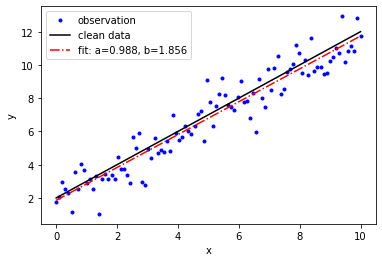

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def func(x, a, b):
  return a * x + b

# generate clean data
x = np.linspace(0, 10, 100)
y = func(x, 1, 2)
# add noise with normal distribution
yn = y + 0.9 * np.random.normal(size=len(x))

# apply fit using best-fit method
popt, pcov = curve_fit(func, x, yn)

plt.plot(x, yn, 'b.', label='observation')
plt.plot(x, y, 'k-', label='clean data')
plt.plot(x, func(x, *popt), 'r-.', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## <strong>linear regression:gaussian</strong>

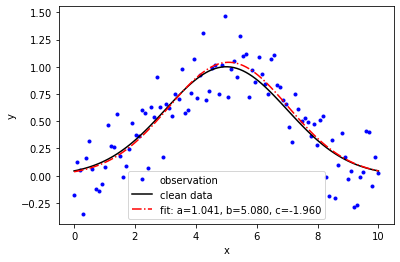

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def func(x, a, b, c):
  return a*np.exp(-(x-b)**2/(2*c**2))

# generate clean data
x = np.linspace(0, 10, 100)
y = func(x, 1, 5, 2)
# add noise with normal distribution
yn = y + 0.2 * np.random.normal(size=len(x))

# apply fit using non-linear least squares to fit a function
popt, pcov = curve_fit(func, x, yn)

plt.plot(x, yn, 'b.', label='observation')
plt.plot(x, y, 'k-', label='clean data')
plt.plot(x, func(x, *popt), 'r-.', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## <strong>Solver</strong>

[-3.]


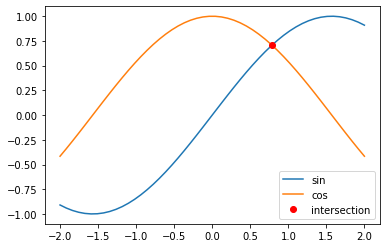

In [ ]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Defining line function
line = lambda x: x + 3
solution = fsolve(line, -20)
print(solution)


def findIntersection(fun1,fun2,x0):
 return fsolve(lambda x : fun1(x) - fun2(x), x0)

result = findIntersection(np.sin,np.cos,0.0)
x = np.linspace(-2,2,50)
plt.plot(x, np.sin(x), label='sin')
plt.plot(x, np.cos(x), label='cos')
plt.plot(result, np.sin(result),'ro',label='intersection')
plt.legend()
plt.show()

## <strong>Interpolation</strong>

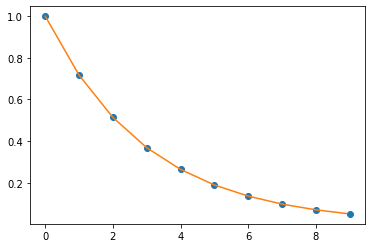

In [ ]:
import matplotlib.pyplot as plt
from scipy import interpolate
x = np.arange(0, 10)
y = np.exp(-x/3.0)
f = interpolate.interp1d(x, y)

xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

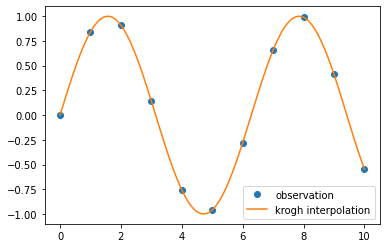

In [ ]:
import matplotlib.pyplot as plt
from scipy.interpolate import krogh_interpolate
x_observed = np.linspace(0.0, 10.0, 11)
y_observed = np.sin(x_observed)
x = np.linspace(min(x_observed), max(x_observed), num=100)
y = krogh_interpolate(x_observed, y_observed, x)

plt.plot(x_observed, y_observed, "o", label="observation")
plt.plot(x, y, label="krogh interpolation")
plt.legend()
plt.show()

## <strong>Clustering</strong>

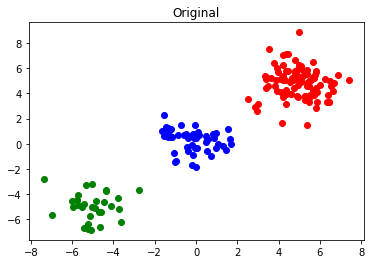

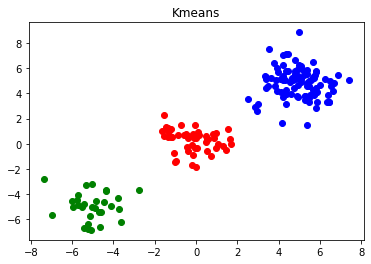

In [ ]:
from numpy import array
from scipy.cluster import vq
import matplotlib.pyplot as plt

c1 = np.random.randn(100, 2) + 5
c2 = np.random.randn(30, 2) - 5
c3 = np.random.randn(50, 2)
# 180 x 2
data = np.vstack([c1, c2, c3])

centroids, variance = vq.kmeans(data, 3)
identified, distance = vq.vq(data, centroids)
vqc1 = data[identified == 0]
vqc2 = data[identified == 1]
vqc3 = data[identified == 2]

plt.title('Original')
plt.scatter(c1[:, 0], c1[:, 1], c='r')
plt.scatter(c2[:, 0], c2[:, 1], c='g')
plt.scatter(c3[:, 0], c3[:, 1], c='b')
plt.show()

plt.title('Kmeans')
plt.scatter(vqc1[:, 0], vqc1[:, 1], c='r')
plt.scatter(vqc2[:, 0], vqc2[:, 1], c='g')
plt.scatter(vqc3[:, 0], vqc3[:, 1], c='b')
plt.show()


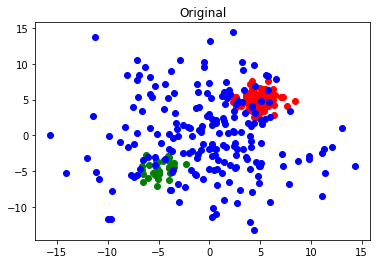

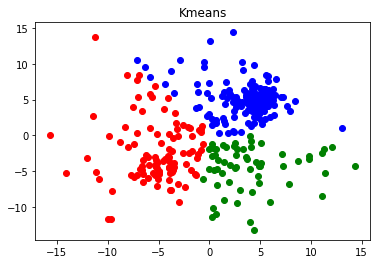

In [ ]:
from numpy import array
from scipy.cluster import vq
import matplotlib.pyplot as plt

c1 = np.random.randn(100, 2) + 5
c2 = np.random.randn(30, 2) - 5
c3 = np.random.randn(200, 2)
c3[:,0] = c3[:,0] + 5 * np.random.normal(size=len(c3))
c3[:,1] = c3[:,1] + 5 * np.random.normal(size=len(c3))
# 180 x 2
data = np.vstack([c1, c2, c3])

centroids, variance = vq.kmeans(data, 3)
identified, distance = vq.vq(data, centroids)
vqc1 = data[identified == 0]
vqc2 = data[identified == 1]
vqc3 = data[identified == 2]

plt.title('Original')
plt.scatter(c1[:, 0], c1[:, 1], c='r')
plt.scatter(c2[:, 0], c2[:, 1], c='g')
plt.scatter(c3[:, 0], c3[:, 1], c='b')
plt.show()

plt.title('Kmeans')
plt.scatter(vqc1[:, 0], vqc1[:, 1], c='r')
plt.scatter(vqc2[:, 0], vqc2[:, 1], c='g')
plt.scatter(vqc3[:, 0], vqc3[:, 1], c='b')
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.rand is deprecated and will be removed in SciPy 2.0.0, use numpy.random.rand instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  if __name__ == '__main__':


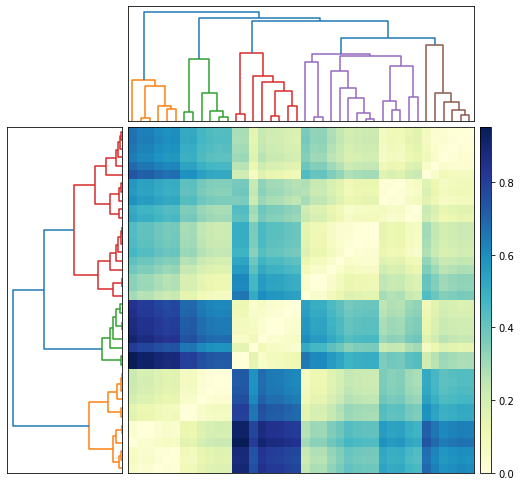

In [ ]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform


# Generate random features and distance matrix.
x = scipy.rand(40)
D = scipy.zeros([40,40])
for i in range(40):
    for j in range(40):
        D[i,j] = abs(x[i] - x[j])

condensedD = squareform(D)

# Compute and plot first dendrogram.
fig = pylab.figure(figsize=(8,8))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(condensedD, method='centroid')
Z1 = sch.dendrogram(Y, orientation='left')
ax1.set_xticks([])
ax1.set_yticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(condensedD, method='single')
Z2 = sch.dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=pylab.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
pylab.colorbar(im, cax=axcolor)
fig.show()

## <strong>Clustering</strong>

Text(-11, 10, 'DBSCAN identified')

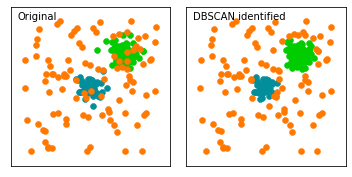

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 데이터 생성
c1 = np.random.randn(100, 2) + 5
c2 = np.random.randn(50, 2)
# 균등 분포된 배경 생성
u1 = np.random.uniform(low=-10, high=10, size=100)
u2 = np.random.uniform(low=-10, high=10, size=100)
c3 = np.column_stack([u1, u2])
# 150x2 크기의 배열 한 개에 데이터를 모두 담는다.
data = np.vstack([c1, c2, c3])
# DBSCAN 함수로 클러스터 연산
# db.labels_은 데이터의 각기 다른 클러스터에 대한 배열이다.
db = DBSCAN(eps=0.95, min_samples=10).fit(data)
labels = db.labels_
# 중심으로 탐지된 점들의 좌표를 구한다.
# 0과 1로 표시된 두 개의 클러스터가 있고,
# -1은 노이즈이다. 여기서는 어디에 속하느냐에 따라 데이터를 분류했다.
dbc1 = data[labels == 0]
dbc2 = data[labels == 1]
noise = data[labels == -1]
# 그래프 설정
x1, x2 = -12, 12
y1, y2 = -12, 12
fig = plt.figure()
fig.subplots_adjust(hspace=0.1, wspace=0.1)
ax1 = fig.add_subplot(121, aspect='equal')
ax1.scatter(c1[:,0], c1[:,1], lw=0.5, color='#00CC00')
ax1.scatter(c2[:,0], c2[:,1], lw=0.5, color='#028E9B')
ax1.scatter(c3[:,0], c3[:,1], lw=0.5, color='#FF7800')
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax1.set_xlim(x1, x2)
ax1.set_ylim(y1, y2)
ax1.text(-11, 10, 'Original')
ax2 = fig.add_subplot(122, aspect='equal')
ax2.scatter(dbc1[:,0], dbc1[:,1], lw=0.5, color='#00CC00')
ax2.scatter(dbc2[:,0], dbc2[:,1], lw=0.5, color='#028E9B')
ax2.scatter(noise[:,0], noise[:,1], lw=0.5, color='#FF7800')
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax2.set_xlim(x1, x2)
ax2.set_ylim(y1, y2)
ax2.text(-11, 10, 'DBSCAN identified')
#fig.savefig('scikit_learn_clusters.pdf', bbox_inches='tight')